In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [15]:
data_f = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data_f.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# ---- Step 1: Separate categorical and numerical columns ----
cat_cols = [col for col in data_f.columns if data_f[col].dtype == 'object']
num_cols = [col for col in data_f.columns if data_f[col].dtype != 'object']

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
Numerical Columns: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


In [4]:
# ---- Step 2: Drop unnecessary columns if not already done ----
data_clean = data_f.drop(columns=['Person ID', 'Sleep Disorder'], errors='ignore')

In [5]:
# ---- Step 3: Handle Gender separately (Male = 1, Female = 0) ----
data_clean['Gender'] = data_clean['Gender'].map({'Male': 1, 'Female': 0})

In [6]:
# 4) Keep only those categorical columns that actually exist and are not 'Gender'
other_cat_cols = [col for col in cat_cols if col != 'Gender' and col in data_clean.columns]
print("Will one-hot encode these:", other_cat_cols)

Will one-hot encode these: ['Occupation', 'BMI Category', 'Blood Pressure']


In [10]:
# 5) One-hot encode safely (if there are none, skip)
if other_cat_cols:
    data_encoded = pd.get_dummies(data_clean, columns=other_cat_cols, drop_first=True)
else:
    data_encoded = data_clean.copy()

In [11]:
# 6) Standardize numeric columns (optionally exclude the binary Gender column)
num_cols = data_encoded.select_dtypes(include=[np.number]).columns.tolist()
# If you don't want to scale Gender (0/1), exclude it:
num_cols_to_scale = [c for c in num_cols if c != 'Gender']

scaler = StandardScaler()
if num_cols_to_scale:
    data_encoded[num_cols_to_scale] = scaler.fit_transform(data_encoded[num_cols_to_scale])


In [12]:
# 7) Quick check
print(data_encoded.head())
print("\nMeans (scaled cols):\n", data_encoded[num_cols_to_scale].mean().round(6))
print("\nStds (scaled cols):\n", data_encoded[num_cols_to_scale].std().round(6))

   Gender       Age  Sleep Duration  Quality of Sleep  \
0       1 -1.753096       -1.298887         -1.098280   
1       1 -1.637643       -1.173036         -1.098280   
2       1 -1.637643       -1.173036         -1.098280   
3       1 -1.637643       -1.550588         -2.771424   
4       1 -1.637643       -1.550588         -2.771424   

   Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0                -0.825418      0.347021    1.654719    -1.619584   
1                 0.039844      1.475592    1.170474     1.970077   
2                 0.039844      1.475592    1.170474     1.970077   
3                -1.402260      1.475592    3.591698    -2.362273   
4                -1.402260      1.475592    3.591698    -2.362273   

   Occupation_Doctor  Occupation_Engineer  ...  Blood Pressure_130/85  \
0              False                False  ...                  False   
1               True                False  ...                  False   
2               True   

In [20]:
occupation_sleep = data_f.groupby('Occupation')['Sleep Duration']
print(occupation_sleep.mean())

Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_12160\334550038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_sleep.index, y=occupation_sleep.values, palette='viridis')


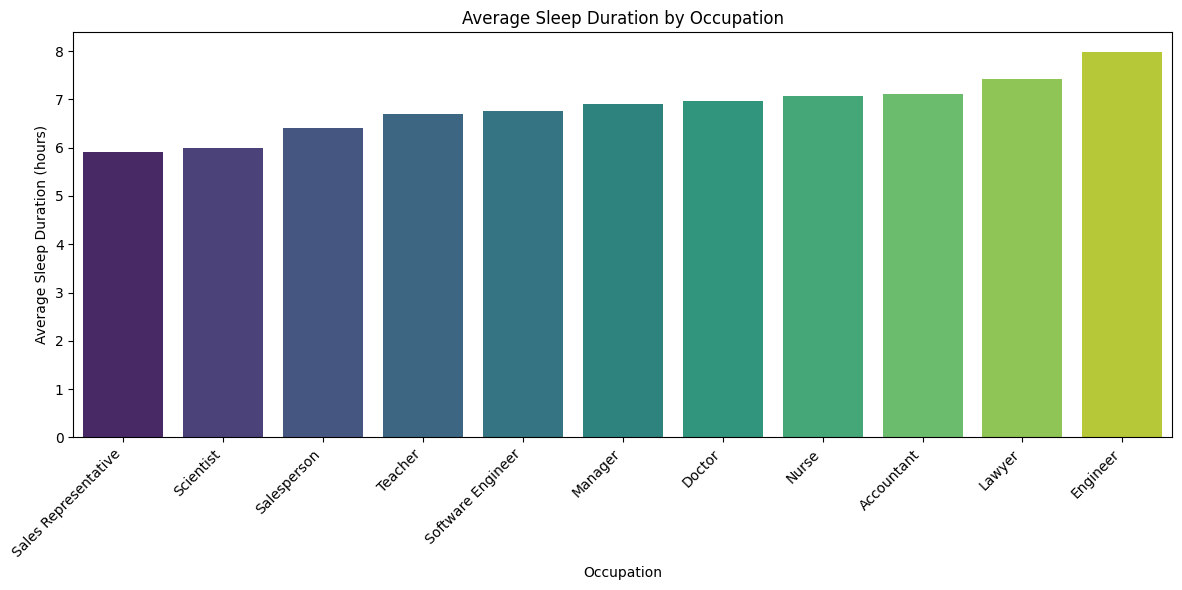

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Occupation and calculate mean sleep duration
occupation_sleep = data_f.groupby('Occupation')['Sleep Duration'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_sleep.index, y=occupation_sleep.values, palette='viridis')

plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_12160\4193259261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_f, x='Occupation', y='Sleep Duration', palette='Set2')


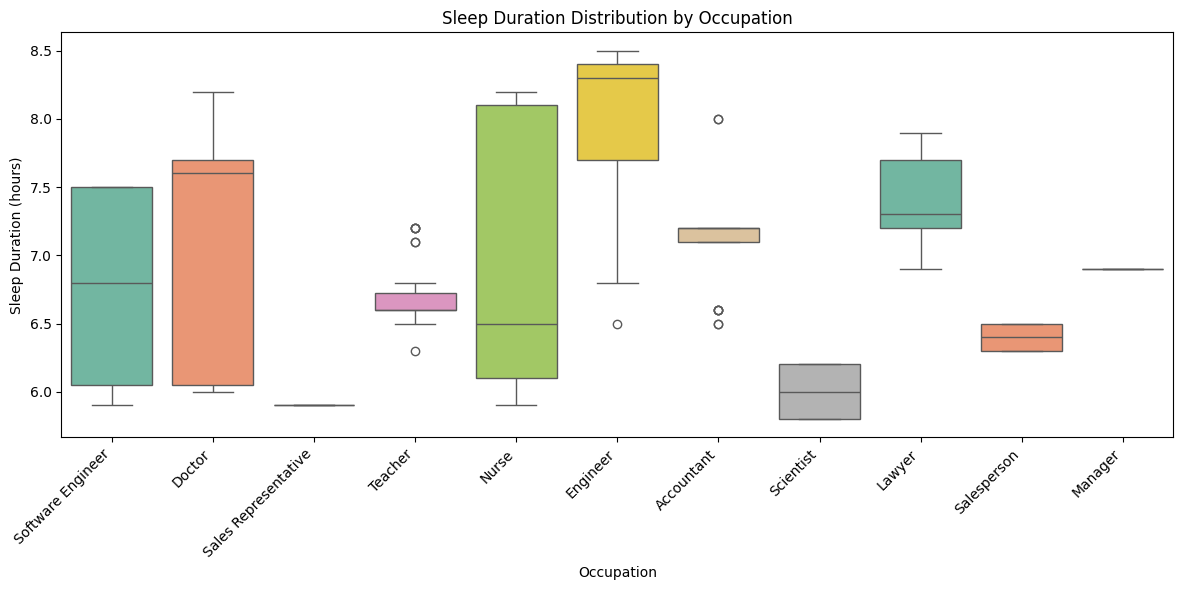

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_f, x='Occupation', y='Sleep Duration', palette='Set2')

plt.title('Sleep Duration Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
